## 方向梯度直方图

在前面的两个实验中，我们了解到传统的目标检测流程可分为三个步骤：

- 第一步是使用滑动窗口和图像金字塔从图片中选择一些区域。
- 第二步是将选择出来的区域转化为人工设计的特征，可称为**特征提取**。
- 第三步是将这些特征输入分类器进行分类。

方向梯度直方图（Histogram of Oriented Gradients）以下简称 HOG，就是一种**人工设计的特征**，用来简化图像表述的特征描述符。

下图中左边的图片是一只猫，我们不仅可以看出猫身体上的特征、颜色、纹理，而且还能看到背景。
右边的图片是使用 HOG 来表示的图片，除了可以看到图中能看出猫的外形，其他的细节包括背景几乎都被去除了，故右边的图片是左边图片的一种简化表示形式。
**HOG 可以用来表示物体的形状、外形特征，将这些特征输入分类器就可以实现目标的分类。**

![](../dataset/3_hog/方向梯度直方图例子.jpg)

在传统的算法中，使用 HOG 描述图片，可以保留有用信息，剔除无用的信息，这样不仅减少计算量，还使得分类器的效果更好。HOG 可以分为以下几个步骤：预先归一化、计算水平和垂直方向梯度、计算梯度直方图、区域（Blocks）归一化。在接下来的教程我们会逐个介绍。

## 使用 Scikit-image 实现方向梯度直方图

上面我们介绍了 HOG 的基本原理。
接下来我们使用 Scikit-image 中现成的 HOG 算法。
我们首先导入测试使用的图片。

In [1]:
from skimage import feature
from skimage import exposure
from matplotlib import pyplot as plt
import cv2

%matplotlib inline

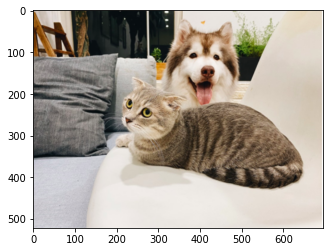

In [2]:
# 使用一张图像进行测试
image = cv2.imread("../dataset/3_hog/pets.jpg") # 读取样例图像
plt.imshow(image[:,:,::-1]) # 图像显示

我们使用 feature.hog 用于计算图片的方向梯度直方图。该函数的参数意义如下所示。

- 第一个参数 image 表示输入图像。
- orientations 表示要将梯度方向分成几个区间，这里我们将梯度方向分为 9 个区间。
- pixels_per_cell 表示 Cell 的尺寸，即一个 Cell 中有几个像素，需要传递一个元组给该参数，我们将 (8, 8) 传递给该参数。
- cells_per_block 表示每个 Block 的尺寸，即一个 Block 中有几个 Cells，这里需要传递一个元组给该参数，我们将 (2, 2) 传递给该参数。
- transform_sqrt 表示伽马校正，我们将 True 传递给该参数表示使用伽马校正预先对图片进行归一化处理。
- visualize 表示可视化，将 True 传递给该参数表示返回 HOG 图像。

该函数会有两个返回值：
- 第一个值 o 是 HOG 图像的一维展开数组。
- 第二个值 hog 表示返回一个高和宽同输入图像一样的二维数组，这个值可用于可视化方向梯度直方图

In [10]:
(o, hog) = feature.hog(image, orientations=9, pixels_per_cell=(8, 8),
    cells_per_block=(2, 2), transform_sqrt=True, visualize=True)
print(o.shape, hog.shape)

(198144,) (522, 696)


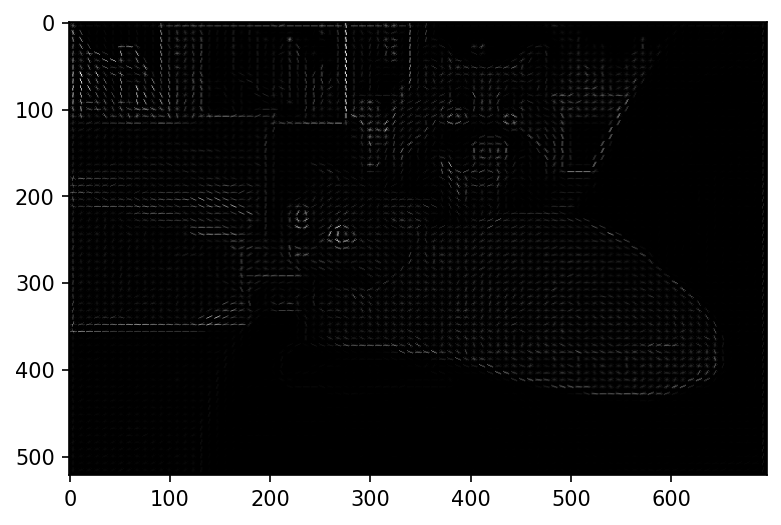

In [11]:
# 显示 HOG 提取特征后的图片, 因为 hog 元素被归一化了, 值比较小, 我们重新拉伸一下
plt.figure(dpi=150)
plt.imshow(hog, cmap = 'gray', aspect='auto')

接下来我们使用 exposure.rescale_intensity 来调整的输入图片的像素值大小或像素强度。
因为获得的 hog 中的元素值都为被归一化了，所以这些值都比较小，如果直接将这些值作为图像的像素值，那么该图像看起来像一张全黑图片，我们需要用该函数将这些值拉伸到一个较大的范围。

In [12]:
hog = exposure.rescale_intensity(hog, out_range=(0, 255)) # 将图片的像素值拉伸到指定的范围, 即 (0, 255) 的范围
hog = hog.astype("uint8") # 将元素转换为 uint8 类型
hog[hog > 50] = 255 # 将 hog 大于 50 的值赋值为 255

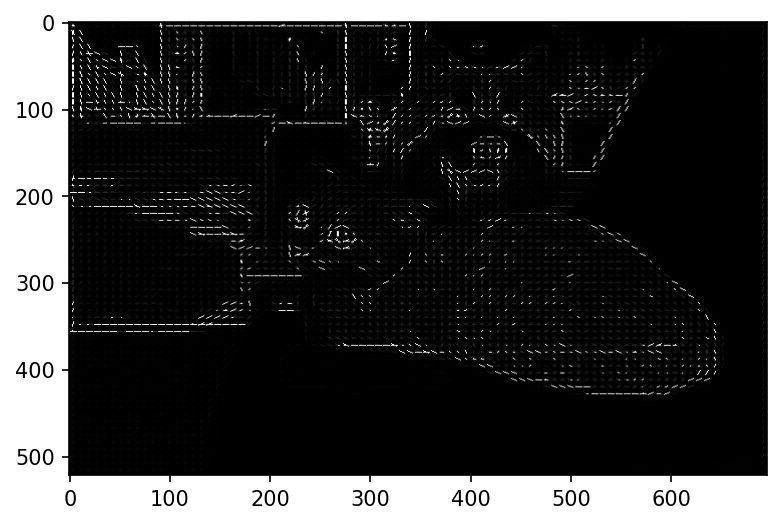

In [13]:
# 显示 HOG 提取特征后的图片
plt.figure(dpi=150)
plt.imshow(hog, cmap = 'gray', aspect='auto')